# Exercice 1:

In [1]:
import numpy.random as rd
import math
import matplotlib.pyplot as plt

#### Q1)

soit u appartient à \[0,1[ 

on a (n2 - n1 + 1)u -1 < E((n2 - n1 + 1)u) <= (n2 - n1 + 1)u

et comme -1 < (n2 - n1 + 1)u - 1 et (n2 - n1 + 1)u < n2 - n1 + 1

Alors -1 < E((n2 - n1 + 1)u) < n2 - n1 + 1

Donc n1 - 1 < n1 + E((n2 - n1 + 1)u) < n2 + 1

Alors n1 <= n1 + E((n2 - n1 + 1)u) <= n2

on pose v = n1 + E((n2 - n1 + 1)u)

donc v appartient à [n1,n2]

#### Q2)

In [2]:
def uniforme(n1, n2):
    u = rd.random()
    v = n1 + math.floor((n2 - n1 + 1)*u)
    return v

#### Q3)

In [3]:
uniforme(1,6)

6

#### Q4)

In [4]:
def repeterDe(N):
    resultats = []
    for i in range(N):
        resultats.append(uniforme(1, 6))
    return resultats

#### Q5)

In [5]:
def probabilite_A(i, N):
    experiences = repeterDe(N)
    c = 0
    for face in experiences:
        if face == i:
            c = c + 1
    return c/N

#### Q6)

In [6]:
def probabilite_B(N):
    experiences = repeterDe(N)
    c = 0
    for face in experiences:
        if face % 2 == 0:
            c = c + 1
    return c/N

Vérification:

la probabilité des nombre pairs dans le range \[1,6[ est 1/2

#### Q7)

In [7]:
def counter(l,e):
    c = 0
    for element in l:
        if element == e:
            c = c + 1
    return c/len(l)

#### Q8)

<BarContainer object of 6 artists>

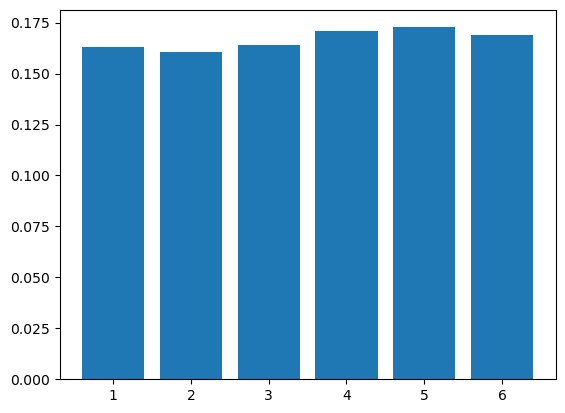

In [8]:
N = 10000
l = repeterDe(N)
ab = [i for i in range(1,7)]
evenements = [counter(l,i) for i in ab]
plt.bar(ab, evenements)

# Exercice 2:

### Première partie:

#### Q1)

In [9]:
def piece(p):
    return 1 if rd.random() < p else 0

#### Q2)

In [10]:
def repeterPiece(p, N):
    resultats = []
    for i in range(N):
        resultats.append(piece(p))
    return resultats

#### Q3)

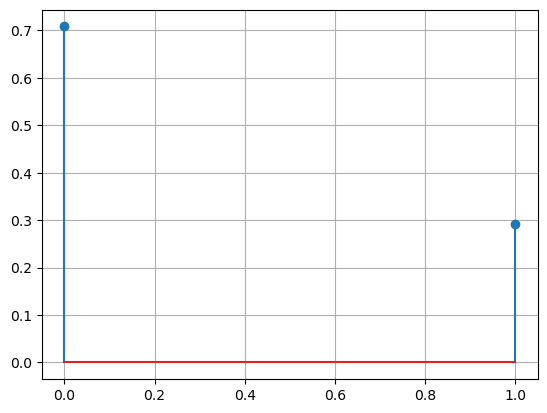

In [11]:
N = 10000
p = 0.3
l = repeterPiece(p, N)
abscices = [0, 1]
fréquences = [counter(l, 0), counter(l, 1)]
plt.stem(abscices, fréquences)
plt.grid()

## Deuxième partie:

#### Q4)

In [12]:
def nbrSucces(n, p):
    l = repeterPiece(p, n)
    c = 0
    for i in l:
        if i == 0:
            c = c + 1
    return c

#### Q5)

In [13]:
def repeterNbrSucces(n, p, N):
    resultats = []
    for i in range(N):
        resultats.append(nbrSucces(n, p))
    return resultats

#### Q6)

<BarContainer object of 50 artists>

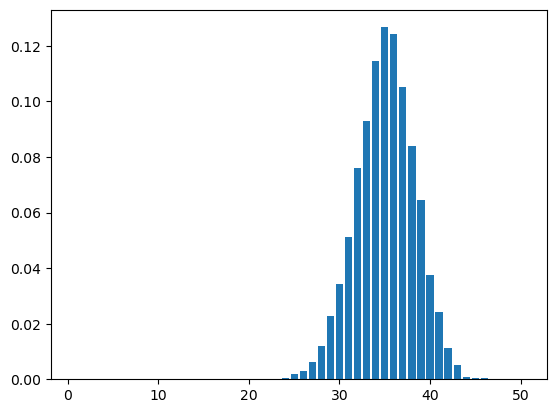

In [14]:
N = 10000
n = 50
p = 0.3
l = repeterNbrSucces(n, p, N)
abscices = [i for i in range(1, n+1)]
fréquences = [counter(l, i) for i in abscices]
plt.bar(abscices, fréquences)

# Exercice 3:

#### Q1)

In [15]:
urne1 = ["blanche", "blanche", "noire"]
urne2 = ["blanche", "blanche", "blanche", "noire"]
urne3 = ["blanche", "blanche", "noire", "noire"]

In [16]:
def urne():
    u = uniforme(1,3)
    if u == 1:
        return urne1
    if u == 2:
        return urne2
    return urne3

def repetertirer(N):
    resultats = []
    for i in range(N):
        urn = urne()
        resultats.append(urn[uniforme(1,len(urn)) - 1])
    return resultats

def blanche_frequence():
    experiences = repetertirer(10000)
    c = 0
    for boule in experiences:
        if boule == "blanche":
            c = c + 1
    return c/N
        

In [17]:
blanche_frequence()

0.6392

#### Q2)

d'aprés l'arbre pondéré:

la probabilité d'obtenir une boule blanche est ( ((1/3)(2/3)) + ((1/3)(3/4)) + ((1/3)(1/2)) ) 

c.à.d la probabilité est: ( (2/9)+(1/4)+(1/6) )

In [18]:
probabilite = (2/9)+(1/4)+(1/6)
print(blanche_frequence() - probabilite)

-0.002288888888888785


#### Q3)

In [19]:
urne_b = ["blanche" for i in range(10)]
urne_n = ["noire" for i in range(10)]
urne_1 = urne_n + 3*urne_b
urne_2 = 2*urne_n + 2*urne_b

In [20]:
def urne_():
    u = uniforme(1,2)
    if u == 1:
        return urne_1
    return urne_2

def repetertirer_(N):
    resultats = []
    for i in range(N):
        urn = urne_()
        l = [urn[uniforme(1,len(urn)) - 1], urn == urne_1]
        resultats.append(l)
    return resultats

def blanche_frequence_():
    experiences = repetertirer_(10000)
    c = 0
    for boule in experiences:
        if boule[0] == "blanche" and boule[1]:
            c = c + 1
    return c/N


In [21]:

blanche_frequence_()

0.3772

#### Q4)

d'aprés l'arbre pondéré:

la probabilité d'obtenir une boule blanche est ((1/2)(3/4)) 

c.à.d la probabilité est: 3/8

In [22]:
print(blanche_frequence_() - 3/8)

9.999999999998899e-05


# Exercice 4:

#### Q1)

In [23]:
def deplacement(n):
    puce = 1
    for i in range(1, n+1):
        if puce == 1:
            puce = 2
        elif puce == 2:
            if uniforme(1,2) == 1:
                puce = 1
            else : puce = 3
        else : puce = 3
        if puce == 1:
            print(f"Instant {i} : 1")
        elif puce == 2:
            print(f"Instant {i} : 2")
        else :
            print(f"Instant {i} : 3")
    return puce

#### Q2)

In [24]:
def puce(n):
    puce = deplacement(n)
    print(puce)

#### Q3)

In [25]:
def trajet(n):
    ab = [i for i in range(n+1)]
    deplacement = [deplacement(i) for i in ab]
    plt.plot(ab, deplacement)

#### Q4

In [26]:
def arrivee():
    puce = 1
    n = 0
    while puce != 3:
        n = n + 1
        puce = deplacement(n)
        print(puce)
    return n 